In [21]:
# !pip install paddleocr
# !pip install paddlepaddle-gpu

In [ ]:
import os
import sys

from natsort import natsorted
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
import pandas as pd
from omegaconf import OmegaConf

OPR_PATH  = "/home/beliakin/projects/OpenPlaceRecognition"

sys.path.append(OPR_PATH)
sys.path.append(OPR_PATH + "/src")

from opr.models.other.paddleocr.model import PaddleTextRecognitionPipeline

In [20]:
MODEL_CONFIG_PATH = f"{OPR_PATH}/configs/model/paddleocr/config.yaml"
model_config = OmegaConf.load(MODEL_CONFIG_PATH)

model_config.det_model_dir = f"{OPR_PATH}/weights/paddleocr/infer/Multilingual_PP-OCRv3_det_infer"
model_config.rec_model_dir = f"{OPR_PATH}/weights/paddleocr/infer/rec_svtr_tiny_stn_rus/"
model_config.rec_char_dict_path = f"{OPR_PATH}/weights/paddleocr/dict/ru_dict.txt"

In [19]:
pipe = PaddleTextRecognitionPipeline(model_config)

### Converting to onnx

In [32]:
!paddle2onnx --model_dir /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/Multilingual_PP-OCRv3_det_infer/ \
    --model_filename inference.pdmodel \
    --params_filename inference.pdiparams \
    --save_file /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/Multilingual_PP-OCRv3_det_infer/inference.onnx \
    --opset_version 11 \
    --enable_onnx_checker True

[Paddle2ONNX] Start to parse PaddlePaddle model...
[Paddle2ONNX] Model file path: /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/Multilingual_PP-OCRv3_det_infer/inference.pdmodel
[Paddle2ONNX] Parameters file path: /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/Multilingual_PP-OCRv3_det_infer/inference.pdiparams
[Paddle2ONNX] Start to parsing Paddle model...
[Paddle2ONNX] Use opset_version = 11 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.


In [ ]:
"/home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/"

In [20]:
!paddle2onnx --model_dir /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/ \
    --model_filename inference.pdmodel \
    --params_filename inference.pdiparams \
    --save_file /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/inference.onnx \
    --opset_version 16 \
    --enable_onnx_checker True

[Paddle2ONNX] Start to parse PaddlePaddle model...
[Paddle2ONNX] Model file path: /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/inference.pdmodel
[Paddle2ONNX] Parameters file path: /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/inference.pdiparams
[Paddle2ONNX] Start to parsing Paddle model...
[Paddle2ONNX] Use opset_version = 16 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.


### Loading models

In [6]:
from PIL import Image, ImageDraw

def crop_images(image_array, polygon_points_list):
    # image = Image.open(image_path).convert("RGBA")
    image = Image.fromarray(image_array).convert("RGBA")
    width, height = image.size

    cropped_images = []

    for polygon_points in polygon_points_list:
        mask = Image.new('L', (width, height), 0)
        draw = ImageDraw.Draw(mask)
        
        draw.polygon(polygon_points, fill=255)
        masked_image = Image.composite(image, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)
        
        bbox = mask.getbbox()
        if bbox:
            cropped_image = masked_image.crop(bbox).convert("RGB")
            cropped_images.append(np.array(cropped_image).astype(np.uint8))
    
    return cropped_images

def plot_bboxes_grid(images, bboxes_list, nrows=4, ncols=3, figsize=(20, 20)):
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    for i, (img, bboxes) in enumerate(zip(images, bboxes_list)):
        for box in bboxes:
            box = np.array(box).astype(np.int32).reshape(-1, 2)
            cv2.polylines(img, [box], True, color=(255, 255, 0), thickness=2)
        axs[i // ncols, i % ncols].imshow(img)
    plt.show()

In [22]:
image_path = '/archive/savkin/raw_datasets/text_spotting/RusTitW/real_data/test/rus_titw_test/public_test_images/'
all_images = os.listdir(val_path)
all_images = natsorted(all_images)
print(len(all_images))

3795


[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 8, elapsed : 1.594529390335083
[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 8, elapsed : 1.594529390335083
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 8, elapsed : 0.04413962364196777
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 8, elapsed : 0.04413962364196777
Text prediction: асвзроноенкеесльсть телнологийй пристскоилеяельность рсятияй соспоянийе лперспектив 01126.jpg


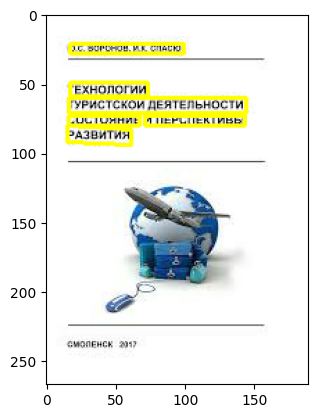

[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.011232137680053711
[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.011232137680053711
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 6, elapsed : 0.010294914245605469
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 6, elapsed : 0.010294914245605469
Text prediction: памятники второй аировойй войнй невскняй араронй 01128.jpg


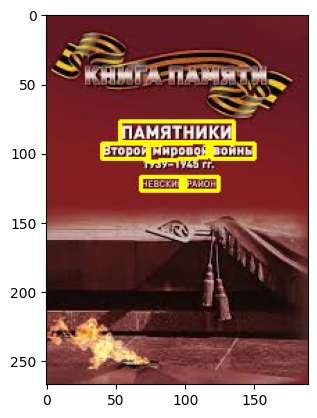

[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.017119646072387695
[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.017119646072387695
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 2, elapsed : 0.009191274642944336
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 2, elapsed : 0.009191274642944336
Text prediction: Сергей Орпов 01129.jpg


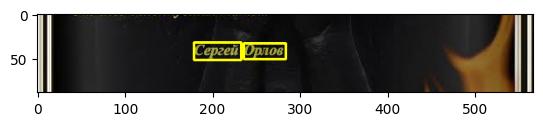

[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.02670121192932129
[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.02670121192932129
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 23, elapsed : 0.036698341369628906
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 23, elapsed : 0.036698341369628906
Text prediction: п месту 558 местий бе75 нестуй 7295 поместуь 75320 7215 01134.jpg


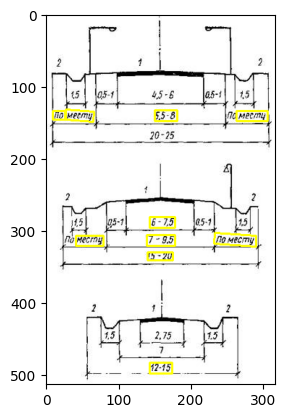

[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.02971172332763672
[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.02971172332763672
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 14, elapsed : 0.026508808135986328
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 14, elapsed : 0.026508808135986328
Text prediction: 4до с4о8 бв8свй з89 768518я4408 10i fouf 8077688св86й 1i sroue 01137.jpg


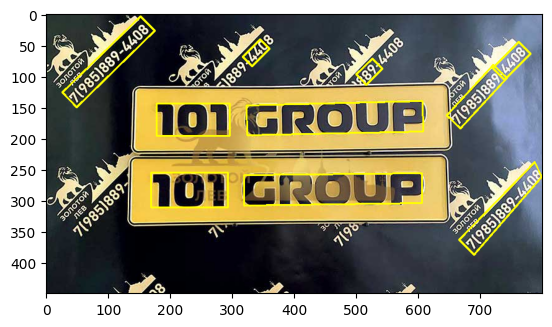

[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.01920771598815918
[2024/06/27 13:32:50] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.01920771598815918
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 10, elapsed : 0.020448923110961914
[2024/06/27 13:32:50] ppocr DEBUG: rec_res num  : 10, elapsed : 0.020448923110961914
Text prediction: 152 августаь патриотй экспо Лrму вогнно международнй сехни рорум ческий 01140.jpg


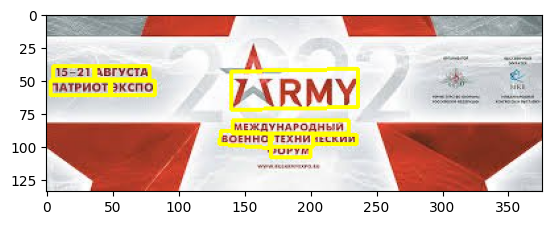

[2024/06/27 13:32:51] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.034540414810180664
[2024/06/27 13:32:51] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.034540414810180664
[2024/06/27 13:32:51] ppocr DEBUG: rec_res num  : 24, elapsed : 0.034842491149902344
[2024/06/27 13:32:51] ppocr DEBUG: rec_res num  : 24, elapsed : 0.034842491149902344
Text prediction: прасией девочнойй раапризер бнезти уерите плоией мальчинйй со иной сложно яне безменя та эта о дуе невозможно самая 01142.jpg


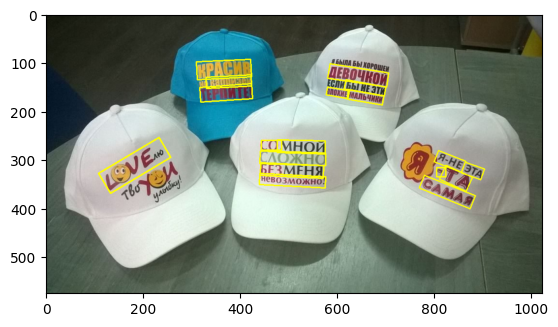

[2024/06/27 13:32:51] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.03363919258117676
[2024/06/27 13:32:51] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.03363919258117676
[2024/06/27 13:32:51] ppocr DEBUG: rec_res num  : 4, elapsed : 0.009898185729980469
[2024/06/27 13:32:51] ppocr DEBUG: rec_res num  : 4, elapsed : 0.009898185729980469
Text prediction: пром ротизнмкап www 01144.jpg


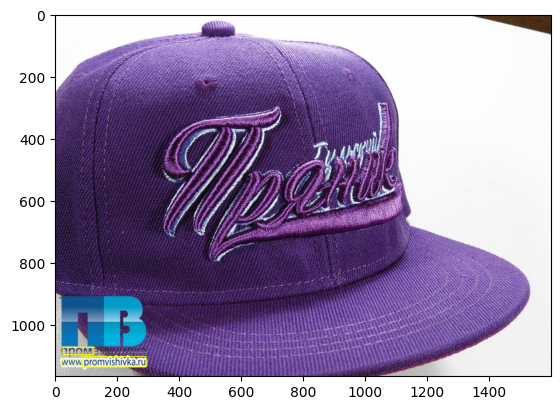

[2024/06/27 13:32:51] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.02646350860595703
[2024/06/27 13:32:51] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.02646350860595703
[2024/06/27 13:32:51] ppocr DEBUG: rec_res num  : 3, elapsed : 0.01207280158996582
[2024/06/27 13:32:51] ppocr DEBUG: rec_res num  : 3, elapsed : 0.01207280158996582
Text prediction: шо дивишся офиска 01150.jpg


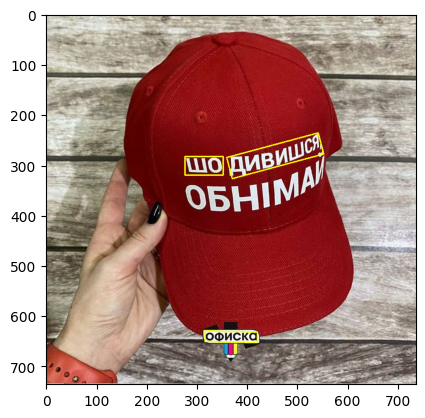

[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 8, elapsed : 1.171520709991455
[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 8, elapsed : 1.171520709991455
[2024/06/27 13:32:53] ppocr DEBUG: rec_res num  : 8, elapsed : 0.018638134002685547
[2024/06/27 13:32:53] ppocr DEBUG: rec_res num  : 8, elapsed : 0.018638134002685547
Text prediction: паник без фея офиска 01156.jpg


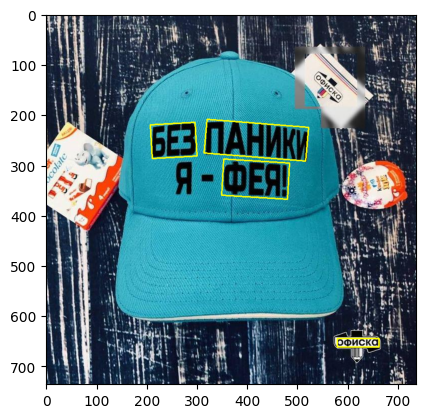

[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.03939962387084961
[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.03939962387084961
[2024/06/27 13:32:53] ppocr DEBUG: rec_res num  : 9, elapsed : 0.018032550811767578
[2024/06/27 13:32:53] ppocr DEBUG: rec_res num  : 9, elapsed : 0.018032550811767578
Text prediction: нве све 01179.jpg


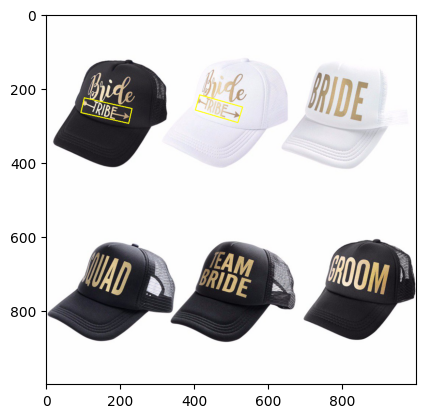

[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.027862548828125
[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.027862548828125
[2024/06/27 13:32:53] ppocr DEBUG: rec_res num  : 3, elapsed : 0.009778738021850586
[2024/06/27 13:32:53] ppocr DEBUG: rec_res num  : 3, elapsed : 0.009778738021850586
Text prediction: сила цвета москва 01181.jpg


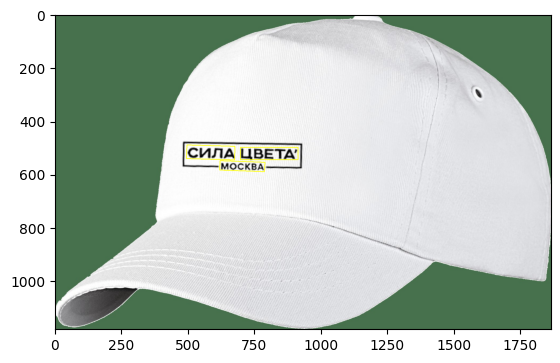

[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.030197858810424805
[2024/06/27 13:32:53] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.030197858810424805
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 17, elapsed : 0.02634716033935547
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 17, elapsed : 0.02634716033935547
Text prediction: Ан ж раздеит ба гроте убзл 01193.jpg


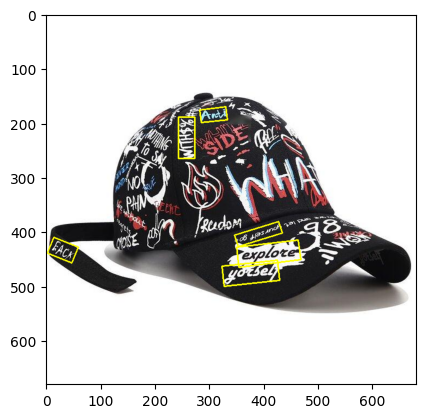

[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017124414443969727
[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017124414443969727
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.011258840560913086
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.011258840560913086
Text prediction:  01200.jpg


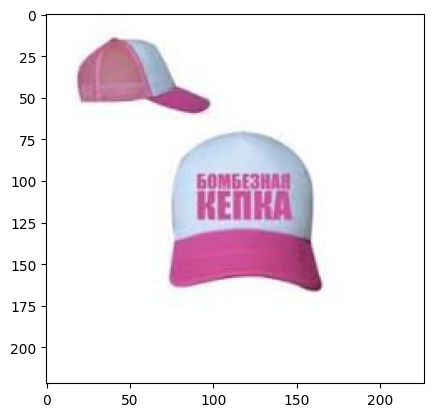

[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01701521873474121
[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01701521873474121
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008919000625610352
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008919000625610352
Text prediction: непдияй 01203.jpg


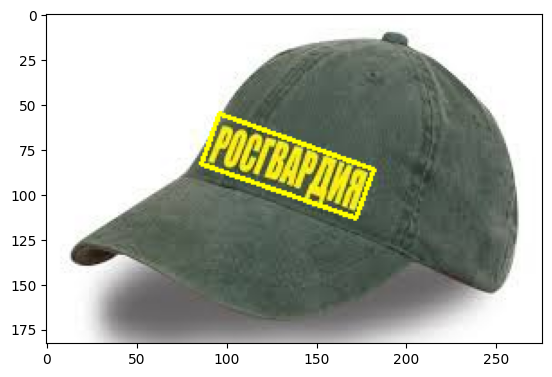

[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.030281543731689453
[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.030281543731689453
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 4, elapsed : 0.010007858276367188
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 4, elapsed : 0.010007858276367188
Text prediction: прам р печать 01211.jpg


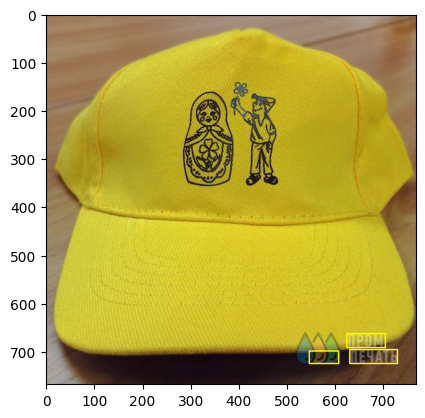

[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.010164022445678711
[2024/06/27 13:32:54] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.010164022445678711
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 2, elapsed : 0.009261846542358398
[2024/06/27 13:32:54] ppocr DEBUG: rec_res num  : 2, elapsed : 0.009261846542358398
Text prediction: сой пзан 01223.jpg


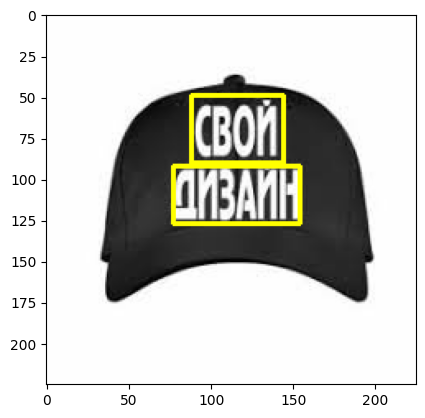

[2024/06/27 13:32:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009683370590209961
[2024/06/27 13:32:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009683370590209961
[2024/06/27 13:32:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008848428726196289
[2024/06/27 13:32:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008848428726196289
Text prediction: месй 01239.jpg


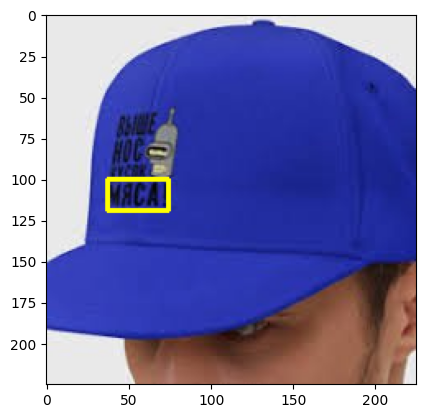

[2024/06/27 13:32:55] ppocr DEBUG: dt_boxes num : 22, elapsed : 0.030319690704345703
[2024/06/27 13:32:55] ppocr DEBUG: dt_boxes num : 22, elapsed : 0.030319690704345703
[2024/06/27 13:32:55] ppocr DEBUG: rec_res num  : 22, elapsed : 0.035423994064331055
[2024/06/27 13:32:55] ppocr DEBUG: rec_res num  : 22, elapsed : 0.035423994064331055
Text prediction: Яркая цветопередача Насщенне цвета термопленок итруй 100д Хлопок водукт Комфорт на протяжений всегодня универсальнй размер Регулируемая металлическая застежка создаст идеальную посадкуь 01243.jpg


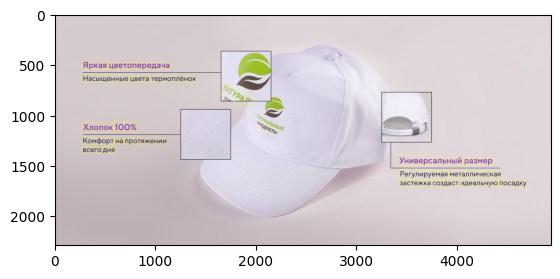

[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016660451889038086
[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016660451889038086
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008920431137084961
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008920431137084961
Text prediction: пб 01248.jpg


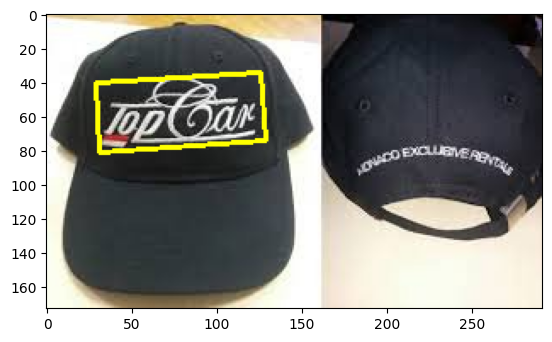

[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.00909423828125
[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.00909423828125
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 0, elapsed : 9.5367431640625e-07
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 0, elapsed : 9.5367431640625e-07
Text prediction:  01249.jpg


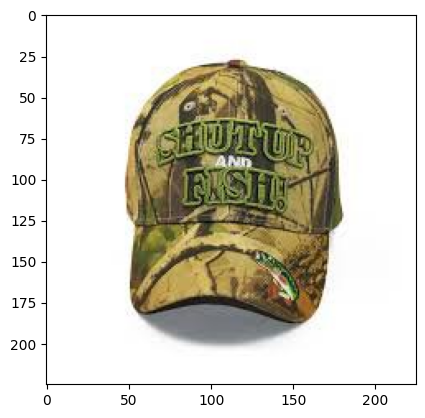

[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008693933486938477
[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008693933486938477
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.009019136428833008
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.009019136428833008
Text prediction: йogo 01269.jpg


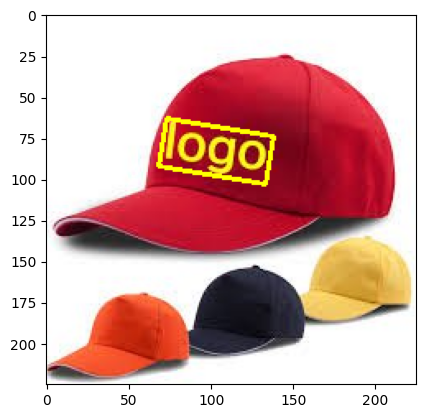

[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.016263723373413086
[2024/06/27 13:32:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.016263723373413086
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
[2024/06/27 13:32:56] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
Text prediction:  01270.jpg


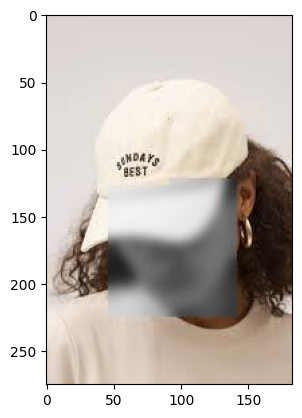

[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.00839996337890625
[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.00839996337890625
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008970499038696289
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.008970499038696289
Text prediction:  01296.jpg


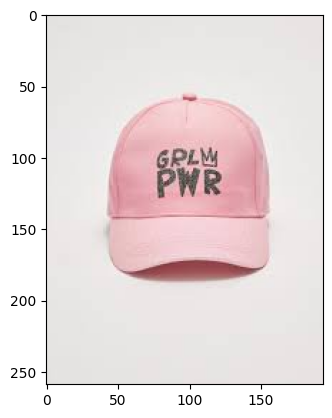

[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.03826165199279785
[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.03826165199279785
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 25, elapsed : 0.04185318946838379
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 25, elapsed : 0.04185318946838379
Text prediction: б р 637 4495 4495 ru 6221 637 4495 в то об пот саму ртп о 95 01306.jpg


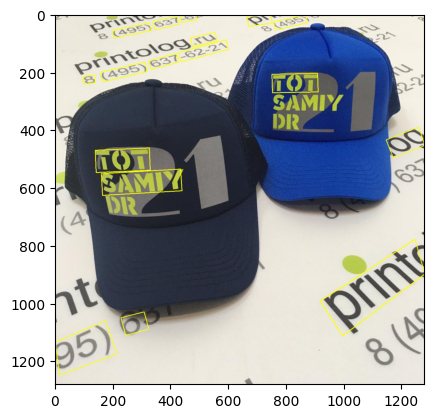

[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.009962320327758789
[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.009962320327758789
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 2, elapsed : 0.00914907455444336
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 2, elapsed : 0.00914907455444336
Text prediction:  01317.jpg


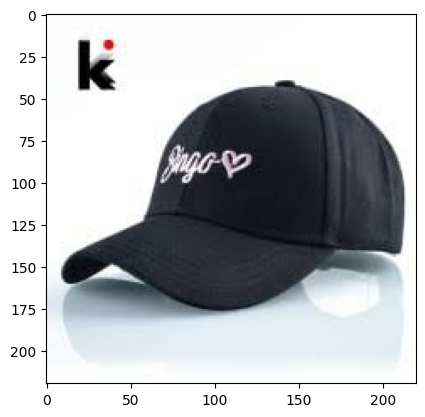

[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.009639739990234375
[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.009639739990234375
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 2, elapsed : 0.009122371673583984
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 2, elapsed : 0.009122371673583984
Text prediction: Сатия 01340.jpg


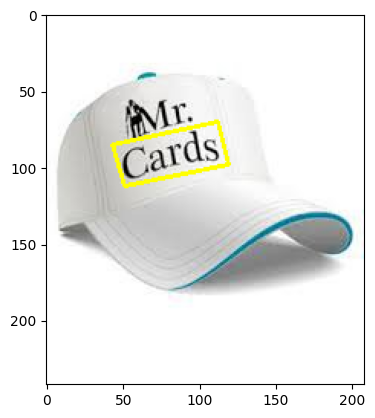

[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.02348637580871582
[2024/06/27 13:32:57] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.02348637580871582
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 4, elapsed : 0.009746789932250977
[2024/06/27 13:32:57] ppocr DEBUG: rec_res num  : 4, elapsed : 0.009746789932250977
Text prediction: тяек вест 01347.jpg


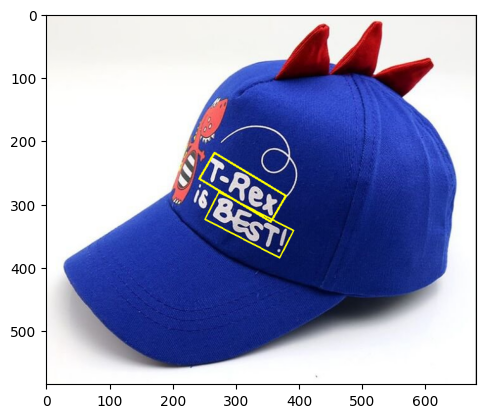

[2024/06/27 13:32:58] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.008888721466064453
[2024/06/27 13:32:58] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.008888721466064453
[2024/06/27 13:32:58] ppocr DEBUG: rec_res num  : 0, elapsed : 9.5367431640625e-07
[2024/06/27 13:32:58] ppocr DEBUG: rec_res num  : 0, elapsed : 9.5367431640625e-07
Text prediction:  01349.jpg


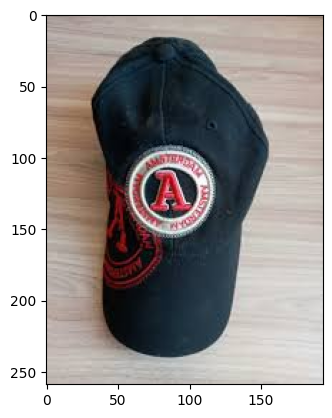

[2024/06/27 13:32:58] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.02880406379699707
[2024/06/27 13:32:58] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.02880406379699707
[2024/06/27 13:32:59] ppocr DEBUG: rec_res num  : 4, elapsed : 1.244563102722168
[2024/06/27 13:32:59] ppocr DEBUG: rec_res num  : 4, elapsed : 1.244563102722168
Text prediction:  01356.jpg


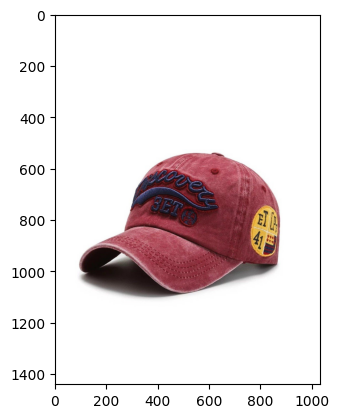

In [8]:
coords = []
images = []
texts = []
stats = []

for im in all_images[120:150]:
    opened_image = cv2.imread(val_path + im)
    opened_image = cv2.cvtColor(opened_image, cv2.COLOR_BGR2RGB)
    filtered_boxes, rec_res, stat = pipe(opened_image)
    stats.append(stat)
    for box in filtered_boxes:
        box = np.array(box).astype(np.int32).reshape(-1, 2)
        cv2.polylines(opened_image, [box], True, color=(255, 255, 0), thickness=2)
    text = " ".join([text for text, prob in rec_res])
    print(f'Text prediction: {text}', im)
    plt.imshow(opened_image)
    plt.show()

In [9]:
df_stats = pd.DataFrame(stats)

In [10]:
df_stats.describe()

det           rec   cls        all
count  30.000000  3.000000e+01  30.0  30.000000
mean    0.111829  5.673196e-02   0.0   0.172688
std     0.350121  2.246751e-01   0.0   0.411797
min     0.008400  4.768372e-07   0.0   0.010182
25%     0.010431  9.044945e-03   0.0   0.021048
50%     0.021347  9.953022e-03   0.0   0.038409
75%     0.030261  2.487260e-02   0.0   0.062893
max     1.594529  1.244563e+00   0.0   1.641947